In [58]:
%pip install tensorflow
%pip install -q scikit-learn
from sklearn.metrics import classification_report

import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from model import load_data
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [59]:
(X, y), test = load_data('mnist.npz')

In [60]:
X = X.reshape(X.shape[0], -1)
print(X.shape)

(60000, 784)


In [61]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.InputLayer((784,)),
        tf.keras.layers.Dense(128, activation='relu', name='L1'),
        tf.keras.layers.Dense(64, activation='relu', name='L2'),
        tf.keras.layers.Dense(10, activation='linear', name='L3')
    ], name="my_model"
)
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [62]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
[layer1, layer2, layer3] = model.layers

In [64]:
w1,b1=layer1.get_weights()
w2,b2=layer2.get_weights()
w3,b3=layer3.get_weights()
print(w1.shape,b1.shape)

(784, 128) (128,)


In [65]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)
history = model.fit(
    X,y,epochs=40
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.7412
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.7412
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2996
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2996
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2116
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2116
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1636
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1636
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1417
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1417
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1235
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1235
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1146
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1146
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━

In [66]:
test_images = test[0][:100]
test_images = test_images.reshape(test_images.shape[0], -1)
print(test_images.shape)

(100, 784)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


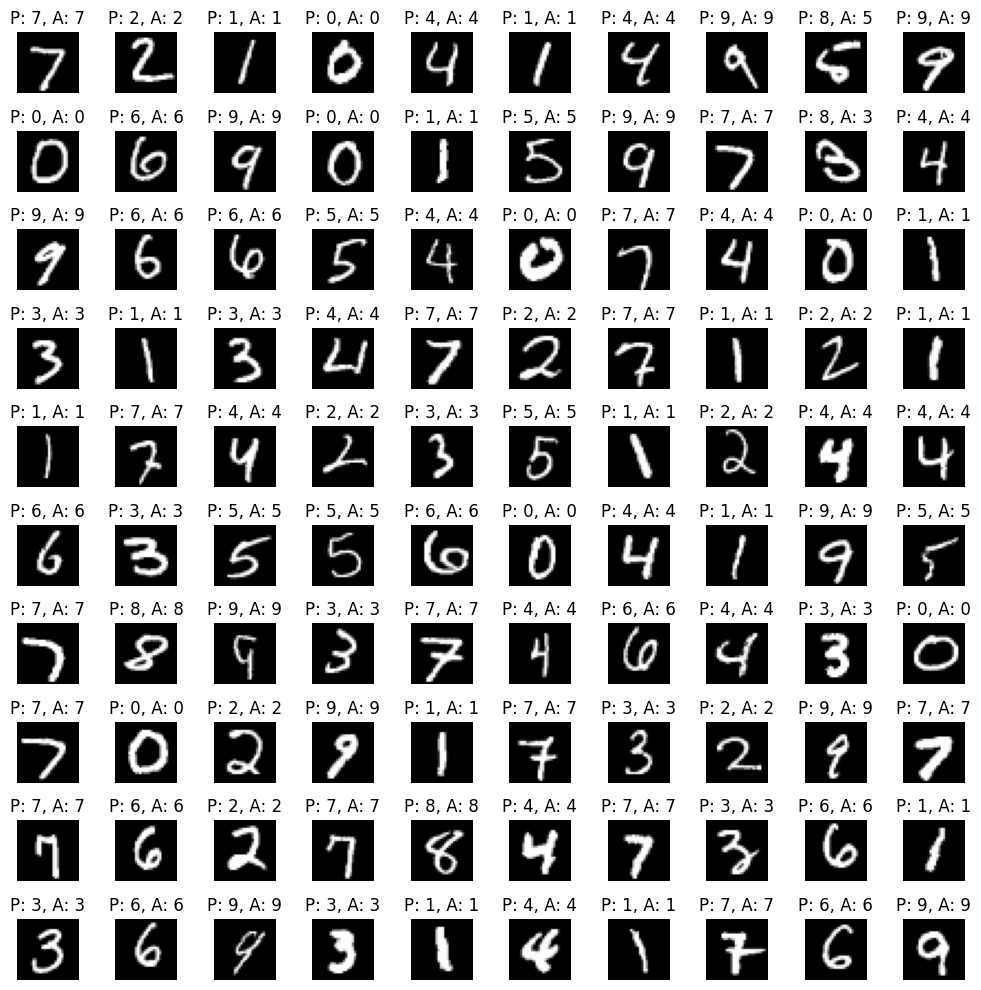

In [ ]:
# Get the actual labels for the first 100 test images
test_labels = test[1][:100]

prediction = model.predict(test_images)
y_hat = np.argmax(prediction, axis=1)

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i].reshape(28, 28), cmap='gray')
    # Set the title to show both predicted (P) and actual (A) labels
    ax.set_title(f"P: {y_hat[i]}, A: {test_labels[i]}")
    ax.axis('off')

# Adjust layout to prevent titles from overlapping
plt.tight_layout()
plt.show()

In [73]:
# Calculate the number of correct predictions
correct_predictions = np.sum(y_hat == test_labels)
# Calculate the total number of predictions
total_predictions = len(test_labels)
# Calculate the accuracy
accuracy = (correct_predictions / total_predictions) * 100
# Print the accuracy, formatted to two decimal places
print(f"Accuracy: {accuracy:.2f}%")

ValueError: operands could not be broadcast together with shapes (100,) (10000,) 

In [71]:

# Generate and print the classification
print(classification_report(test_labels, y_hat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00        14
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        15
           8       0.50      1.00      0.67         2
           9       1.00      1.00      1.00        11

    accuracy                           0.98       100
   macro avg       0.95      0.98      0.95       100
weighted avg       0.99      0.98      0.98       100



In [74]:

# Get the full test dataset
x_test_full = test[0]
y_test_full = test[1]

# Reshape the full test images
x_test_full = x_test_full.reshape(x_test_full.shape[0], -1)

# Make predictions on the full test set
full_prediction = model.predict(x_test_full)
y_hat_full = np.argmax(full_prediction, axis=1)

# Calculate and print the accuracy on the full test set
accuracy_full = np.mean(y_hat_full == y_test_full) * 100
print(f"Accuracy on the full test set: {accuracy_full:.2f}%")

# Generate and print the classification report for the full test set
print("\nClassification report for the full test set:")
print(classification_report(y_test_full, y_hat_full))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
Accuracy on the full test set: 97.32%

Classification report for the full test set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.90      0.98      0.94       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy on the full test set: 97.32%

Classification report for the fu